# PLACEMENT DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Placement_Data_Collection(Responses).csv')
df.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
1,Female,8.68,No,7,5,8,CORE,Yes,No,Yes
2,Male,8.34,No,7,5,7,"DATA SCIENTIST/ANALYST, CORE",Yes,Yes,No
3,Male,8.79,No,5,4,6,CORE,No,No,Yes
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes


In [3]:
df.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
1,Female,8.68,No,7,5,8,CORE,Yes,No,Yes
2,Male,8.34,No,7,5,7,"DATA SCIENTIST/ANALYST, CORE",Yes,Yes,No
3,Male,8.79,No,5,4,6,CORE,No,No,Yes
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes


In [4]:
df.isna().sum()

GENDER                 0
CGPA                   0
ACTIVE BACKLOG         0
COMMUNICATION SKILL    0
CODING SKILL           0
APTITUDE SKILLS        0
APPLIED PROFILE        0
PROJECT                0
INTERNSHIP             0
PLACED                 0
dtype: int64

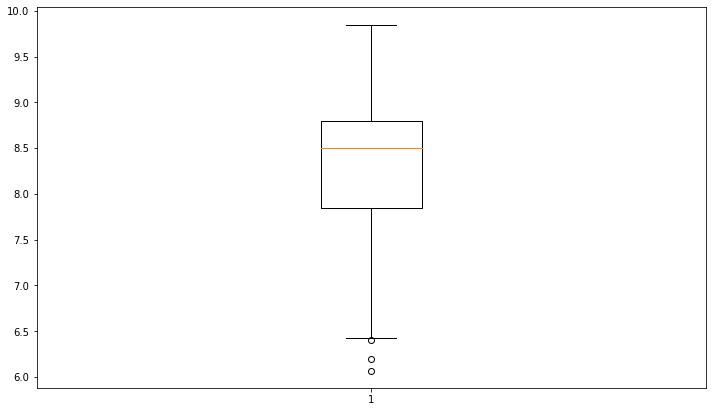

In [5]:
import matplotlib.pyplot as plt
x=df['CGPA']
y=df['PLACED']
plt.figure(figsize=(12,7))
plt.boxplot(x)
plt.show()

In [6]:
core = df.loc[ (df['APPLIED PROFILE'] == 'DATA SCIENTIST/ANALYST, CORE') | (df['APPLIED PROFILE'] == 'CORE') | (df['APPLIED PROFILE']== 'SDE, DATA SCIENTIST/ANALYST, MANAGEMENT, CORE') ]
core.shape

(59, 10)

In [7]:
df['PLACED'].value_counts()


Yes    102
No      49
Name: PLACED, dtype: int64

In [8]:
core.drop(['APPLIED PROFILE'], axis=1, inplace=True)

### Gender based analysis

In [9]:
core.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,PROJECT,INTERNSHIP,PLACED
1,Female,8.68,No,7,5,8,Yes,No,Yes
2,Male,8.34,No,7,5,7,Yes,Yes,No
3,Male,8.79,No,5,4,6,No,No,Yes
6,Male,8.50,No,5,5,8,Yes,Yes,No
8,Male,8.77,No,7,5,8,Yes,Yes,Yes


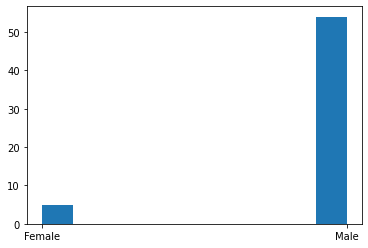

Number of males who sat for placement in CORE is 54
Number of males who got placed is 33
Number of females who sat for placement in CORE is 5
Number of females who got placed is 4


In [10]:
plt.hist(core['GENDER'])
plt.show()
print(f"Number of males who sat for placement in CORE is {core.loc[(core['GENDER'] == 'Male')].shape[0]}")
print(f"Number of males who got placed is {core.loc[(core['GENDER'] == 'Male') & (core['PLACED']=='Yes')].shape[0]}")
print(f"Number of females who sat for placement in CORE is {core.loc[(core['GENDER'] == 'Female')].shape[0]}")
print(f"Number of females who got placed is {core.loc[(core['GENDER'] == 'Female') & (core['PLACED']=='Yes')].shape[0]}")

P(placed|male) = 33/54 **i.e. 64% of the males got placed**

P(placed|female) = 4/5 **i.e. 75% of the females got placed**

### CGPA based analysis

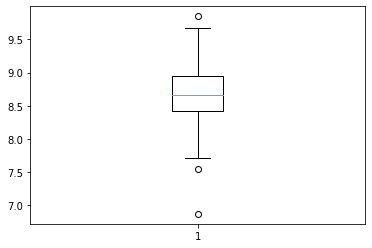

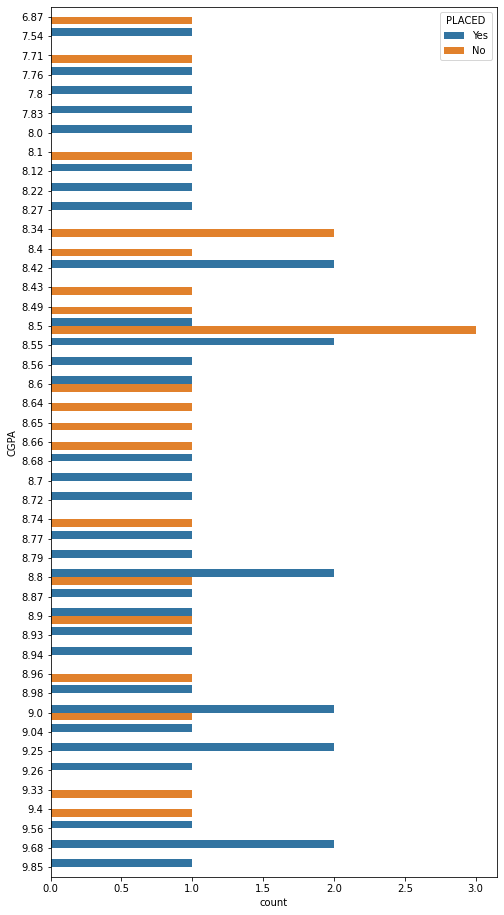

In [11]:
x=core['CGPA']
y=core['PLACED']
plt.boxplot(x)
plt.show()
plt.figure(figsize=(8,16))
sns.countplot(y=x, hue=y)
plt.show()

(53, 9)


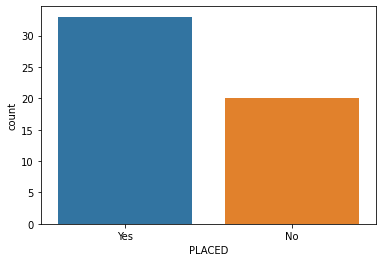

In [12]:
corecgpa = core.loc[(core['CGPA'] >= 8)]
print(corecgpa.shape)
sns.countplot(corecgpa['PLACED'])
plt.show()

P(placed|CGPA>=8) = 33/53 **i.e  62.2% of the people having cgpa >=8 got placed**

P(not placed | CGPA>=8) = 20/53 **i.e 37.8% of the people having cgpa >=8 are unplaced**

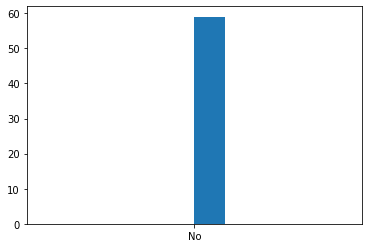

(0, 9)
(0, 9)
(59, 9)
(37, 9)


In [13]:
plt.hist(core['ACTIVE BACKLOG'])
plt.show()
print(core.loc[(core['ACTIVE BACKLOG'] == 'Yes')].shape)
print(core.loc[(core['ACTIVE BACKLOG'] == 'Yes') & (core['PLACED']=='Yes')].shape)
print(core.loc[(core['ACTIVE BACKLOG'] == 'No')].shape)
print(core.loc[(core['ACTIVE BACKLOG'] == 'No') & (core['PLACED']=='Yes')].shape)

No student in core have backlog   
So can't be perform any conclusions

### Communication skills based analysis

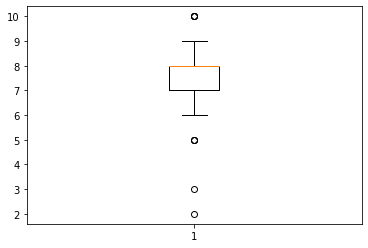

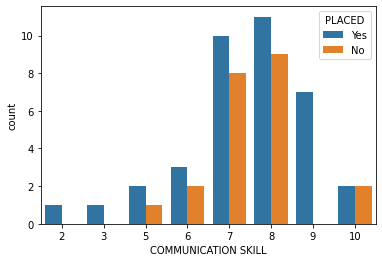

In [14]:
x1=core['COMMUNICATION SKILL']
y=core['PLACED']
plt.boxplot(x1)
plt.show()
sns.countplot(x1,hue= y)
plt.show()

In [15]:
corecom = core.loc[(core['COMMUNICATION SKILL'] >=8.0)]
print(corecom.shape)

(31, 9)


P(placed| communication >= 8.0) = 20/31 **i.e. 64% of the students with CS>=7 got placed**

P(not-placed| communication >= 8.0) = 11/31 **i.e. 36% are unplaced**

### Project based analysis

In [16]:
print('Number of students done the project in applied profile is',core[core['PROJECT']=='Yes'].shape[0])
print('Number of students done the project and are placed is',core[(core['PROJECT']=='Yes') & (core['PLACED']=='Yes')].shape[0])

Number of students done the project in applied profile is 51
Number of students done the project and are placed is 32


Probability(placed | project) = 32/51  **i.e. 63% of the students who had done the  project in applied profile and are placed**

Probability(not placed |project) = 19/51 **i.e. 37% of the students who had done the project in applied profile and are not placed**

### Data preprocessing

In [17]:
core['GENDER'] = core['GENDER'].map({'Male': 1, 'Female': 0})
core['PROJECT'] = core['PROJECT'].map({'Yes': 1, 'No': 0})
core['INTERNSHIP'] = core['INTERNSHIP'].map({'Yes': 1, 'No': 0})
core['ACTIVE BACKLOG'] = core['ACTIVE BACKLOG'].map({'Yes': 1, 'No': 0})

<AxesSubplot:>

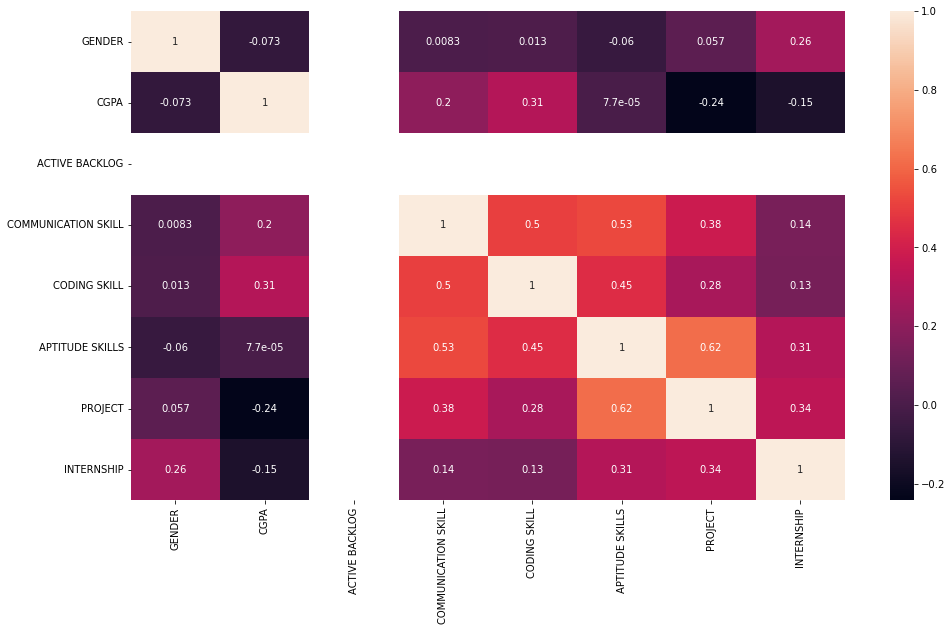

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(core.corr(),annot=True)

k=7 neighbours give the best accuracy  
accuracy = 37/59 == 63%(low)  
We need to remove the uneccsary features

In [19]:
core.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,PROJECT,INTERNSHIP,PLACED
1,0,8.68,0,7,5,8,1,0,Yes
2,1,8.34,0,7,5,7,1,1,No
3,1,8.79,0,5,4,6,0,0,Yes
6,1,8.50,0,5,5,8,1,1,No
8,1,8.77,0,7,5,8,1,1,Yes


In [20]:
core['PLACED'] = core['PLACED'].map({'Yes': 1, 'No': 0})

In [21]:
core['PLACED'].value_counts()

1    37
0    22
Name: PLACED, dtype: int64

In [22]:
core_mino=core[core['PLACED']==0]
core_majo=core[core['PLACED']==1]

In [23]:
from sklearn.utils import resample

In [24]:
core_mino_up=resample(core_mino, replace=True,n_samples=len(core_majo),random_state=42)

In [25]:
core_mino_up['PLACED'].value_counts()

0    37
Name: PLACED, dtype: int64

In [26]:
core=pd.concat([core_mino_up,core_majo]).reset_index(drop=True)

In [27]:
core['PLACED'].value_counts()

0    37
1    37
Name: PLACED, dtype: int64

In [28]:
xc=core.drop('PLACED',axis=1)

In [29]:
yc=core[['PLACED']]

### Data splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xc_train,xc_test, yc_train, yc_test=train_test_split(xc,yc,test_size=0.30, random_state=32)

## Model training and testing

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
xc_train=scaler.fit_transform(xc_train)
xc_test=scaler.transform(xc_test)

### Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression 

In [36]:
lg=LogisticRegression()

In [37]:
lg.fit(xc_train,yc_train)

LogisticRegression()

In [38]:
yc_pred_lg=lg.predict(xc_test)

In [39]:
from sklearn.metrics import accuracy_score

### Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc=DecisionTreeClassifier()

In [42]:
dtc.fit(xc_train, yc_train)

DecisionTreeClassifier()

In [43]:
yc_pred_tree=dtc.predict(xc_test)

### Random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

In [46]:
rf.fit(xc_train,yc_train)

RandomForestClassifier()

In [47]:
yc_pred_rf=rf.predict(xc_test)

### Precision score

In [48]:
from sklearn.metrics import precision_score

In [49]:
precision_score(yc_test,yc_pred_lg)

0.5555555555555556

In [50]:
precision_score(yc_test,yc_pred_tree)

0.6875

In [51]:
precision_score(yc_test,yc_pred_rf)

0.75